### Part 1. Data preparation and visualization
* 1.1. Read the dataset
* 1.2. Delete all the rows containing the missing data. Imputation is not necessary.
* 1.3. Encode the data where necessary.
* 1.4. Visualize the columns and their pairs.
* 1.5. Produce the correlation matrix to make a first guess on usefulness of the predictors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### 1.1. Read the dataset

assignment_data = pd.read_csv("../input/assignment-business-apps/dataset_assignment.csv")
assignment_data.head(10)

,Identifier,sex,age,income,purchase
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0
5,15728773,Male,27.0,58000.0,0.0
6,15598044,Female,27.0,84000.0,0.0
7,15694829,Female,32.0,150000.0,1.0
8,15600575,Male,25.0,33000.0,0.0
9,15727311,Female,35.0,65000.0,0.0


In [2]:
### 1.2. Delete all the rows containing the missing data. Imputation is not necessary.

print("No. of customers in original data:" +str(len(assignment_data.Identifier)))

No. of customers in original data:502


In [3]:
# Info of the data is extracted to identify rows to be deleted.
assignment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Identifier  502 non-null    int64  
 1   sex         502 non-null    object 
 2   age         481 non-null    float64
 3   income      476 non-null    float64
 4   purchase    482 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.7+ KB


In [4]:
# identifying null rows
assignment_data.isnull()

,Identifier,sex,age,income,purchase
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
497,False,False,False,False,True
498,False,False,False,False,True
499,False,False,False,False,True
500,False,False,False,False,True


In [5]:
# sum of null rows in each category are identified
assignment_data.isnull().sum()

Identifier     0
sex            0
age           21
income        26
purchase      20
dtype: int64

In [6]:
# rows with missing informations are dropped.
assignment_data.dropna(inplace= True)
print('Length of dataset after dropping rows with missing data:',len(assignment_data))

Length of dataset after dropping rows with missing data: 438


In [7]:
# rows are checked for any discrepencies.
assignment_data.isnull().sum()

Identifier    0
sex           0
age           0
income        0
purchase      0
dtype: int64

 1.3. Encode the data where necessary.

In [8]:
# Sex category has been one-hot encoded.
sex= pd.get_dummies(assignment_data['sex'], drop_first=True)
assignment_data['sex'] = sex
sex.head(10)

,Male
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [9]:
# The data is checked for any descrepencies.
assignment_data.head(10)

,Identifier,sex,age,income,purchase
0,15624510,1,19.0,19000.0,0.0
1,15810944,1,35.0,20000.0,0.0
2,15668575,0,26.0,43000.0,0.0
3,15603246,0,27.0,57000.0,0.0
4,15804002,1,19.0,76000.0,0.0
5,15728773,1,27.0,58000.0,0.0
6,15598044,0,27.0,84000.0,0.0
7,15694829,0,32.0,150000.0,1.0
8,15600575,1,25.0,33000.0,0.0
9,15727311,0,35.0,65000.0,0.0


1.4. Visualize the columns and their pairs.


Text(0.5, 1.0, 'Age Histogram')

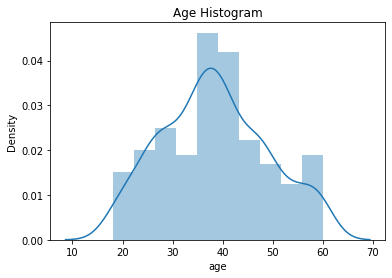

In [10]:
# A histogram of customer's age to understand age demographics. 
sns.distplot(assignment_data['age']).set_title('Age Histogram')

Text(0.5, 1.0, 'Income Histogram')

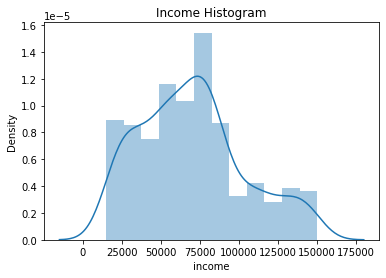

In [11]:
# distribution of the customer's income
sns.distplot(assignment_data['income']).set_title('Income Histogram')

Text(0.5, 1.0, 'Count of males and females in the dataset')

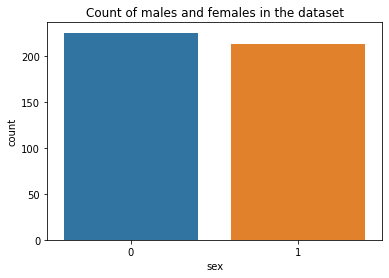

In [12]:
sns.countplot(x="sex", data =assignment_data)
plt.title("Count of males and females in the dataset")

Text(0.5, 1.0, 'Count of purchase over sex')

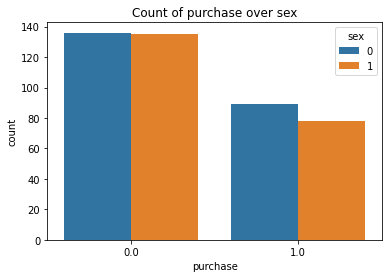

In [13]:
sns.countplot(x="purchase", hue="sex", data =assignment_data)
plt.title("Count of purchase over sex")

Text(0.5, 1.0, 'Boxplot of sex distribution over income')

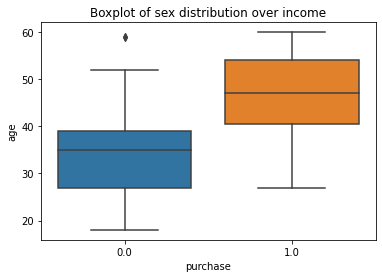

In [14]:
sns.boxplot(x="purchase", y="age", data=assignment_data)
plt.title('Boxplot of sex distribution over income')


Text(0.5, 1.0, 'Boxplot of sex distribution over income')

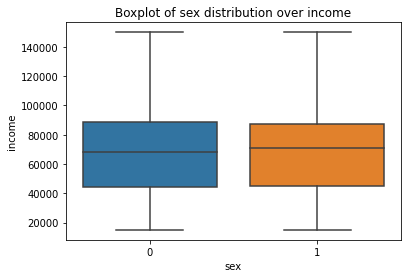

In [15]:
sns.boxplot(x="sex", y="income", data=assignment_data)
plt.title('Boxplot of sex distribution over income')


Text(0.5, 1.0, 'Boxplot of purchase habit over income')

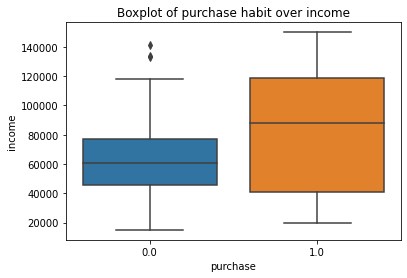

In [16]:
sns.boxplot(x="purchase", y="income", data=assignment_data)
plt.title('Boxplot of purchase habit over income')

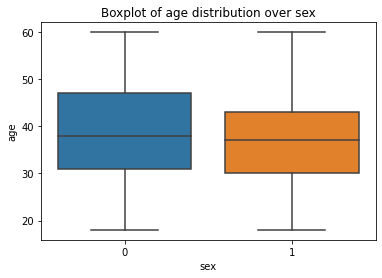

In [17]:
sns.boxplot(x="sex", y="age", data=assignment_data)
plt.title('Boxplot of age distribution over sex')
sns.set(rc={'figure.figsize':(5,5)})

### 1.5 Produce the correlation matrix to make a first guess on usefulness of the predictors

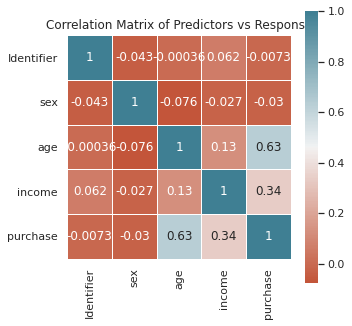

In [18]:
plt.title('Correlation Matrix of Predictors vs Response')
plot = sns.heatmap(assignment_data.corr(), annot=True,cmap=sns.diverging_palette(20, 220, n=200),linewidths=.5,square=True)
sns.set(rc={'figure.figsize':(10,7)})


The correlation matrix shows that age (0.63) and income (0.34) has the highest correlation with purchase. 

## Part 2. Inference by logistic regression
* 2.1. You have 3 predictors (sex, age, income) and the target class variable purchase, taking the value 1 if he or she already bought a car once in the past. To predict this class for new potential customers, you need to learn the logistic regression model parameters.
* 2.2. Divide your client base into training and testing sets.
* 2.3. Fit the model on a training set.
* 2.4. Produce your estimated regression equation, interpret the coefficients and comment on the regression summary.
* 2.5. Try to reduce your model, dropping some predictors, and repeat the above steps with each reduced version.
* 2.6. Compare the fitting results for your models.

In [19]:
X_train, X_test , Y_train, Y_test = train_test_split(assignment_data.drop
                                                     (['Identifier', 'purchase'],axis=1),
                                                     assignment_data['purchase'],
                                                     test_size=0.3,
                                                     random_state=0)

assignment_data['income'] = assignment_data['income']*0.001

In [20]:
#Keep all 3 parameters
X_train = sm.add_constant(X_train)
log_reg_3par = sm.Logit(Y_train, X_train).fit()
print(log_reg_3par.summary2())

Optimization terminated successfully.
         Current function value: 0.354756
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.464     
Dependent Variable: purchase         AIC:              225.1108  
Date:               2021-07-27 18:45 BIC:              240.0052  
No. Observations:   306              Log-Likelihood:   -108.56   
Df Model:           3                LL-Null:          -202.57   
Df Residuals:       302              LLR p-value:      1.6339e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
             Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
const       -12.7922    1.5558  -8.2221  0.0000  -15.8415  -9.7428
sex           0.2946    0.3435   0.8578  0.3910   -0.3786   0.

In [21]:
#Remove Sex 
X_train_dropsex = sm.add_constant(X_train[['age', 'income']])
log_reg_dropsex = sm.Logit(Y_train, X_train_dropsex).fit()
print(log_reg_dropsex.summary2())

Optimization terminated successfully.
         Current function value: 0.355968
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.462     
Dependent Variable: purchase         AIC:              223.8526  
Date:               2021-07-27 18:45 BIC:              235.0233  
No. Observations:   306              Log-Likelihood:   -108.93   
Df Model:           2                LL-Null:          -202.57   
Df Residuals:       303              LLR p-value:      2.1526e-41
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
             Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
const       -12.4762    1.4885  -8.3816  0.0000  -15.3937  -9.5588
age           0.2301    0.0292   7.8780  0.0000    0.1728   0.

In [22]:
#Remove Age
X_train_dropage = sm.add_constant(X_train[['sex', 'income']])
log_reg_dropage = sm.Logit(Y_train, X_train_dropage).fit()
print(log_reg_dropage.summary2())

Optimization terminated successfully.
         Current function value: 0.589592
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: purchase         AIC:              366.8305  
Date:               2021-07-27 18:45 BIC:              378.0013  
No. Observations:   306              Log-Likelihood:   -180.42   
Df Model:           2                LL-Null:          -202.57   
Df Residuals:       303              LLR p-value:      2.4000e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -2.2518     0.3539   -6.3624   0.0000   -2.9455   -1.5581
sex       -0.1427     0.2555   -0.5585   0.5765   -0.6434 

In [23]:
#Remove income
X_train_dropincome = sm.add_constant(X_train[['sex', 'age']])
log_reg_dropincome = sm.Logit(Y_train, X_train_dropincome).fit()
print(log_reg_dropincome.summary2())

Optimization terminated successfully.
         Current function value: 0.434451
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.344     
Dependent Variable: purchase         AIC:              271.8838  
Date:               2021-07-27 18:45 BIC:              283.0545  
No. Observations:   306              Log-Likelihood:   -132.94   
Df Model:           2                LL-Null:          -202.57   
Df Residuals:       303              LLR p-value:      5.7916e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -7.9219     0.9134   -8.6729   0.0000   -9.7121   -6.1317
sex        0.0687     0.3070    0.2238   0.8229   -0.5330 

In [24]:
#Keep Age only
X_train_age = sm.add_constant(X_train['age'])
log_reg_age = sm.Logit(Y_train, X_train_age).fit()
print(log_reg_age.summary2())

Optimization terminated successfully.
         Current function value: 0.434533
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.344     
Dependent Variable: purchase         AIC:              269.9339  
Date:               2021-07-27 18:45 BIC:              277.3811  
No. Observations:   306              Log-Likelihood:   -132.97   
Df Model:           1                LL-Null:          -202.57   
Df Residuals:       304              LLR p-value:      3.9879e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -7.8707     0.8819   -8.9252   0.0000   -9.5991   -6.1423
age        0.1844     0.0214    8.6161   0.0000    0.1425 

In [25]:
#Keep Sex only
X_train_sex = sm.add_constant(X_train['sex'])
log_reg_sex = sm.Logit(Y_train, X_train_sex).fit()
print(log_reg_sex.summary2())

Optimization terminated successfully.
         Current function value: 0.660697
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: purchase         AIC:              408.3464
Date:               2021-07-27 18:45 BIC:              415.7935
No. Observations:   306              Log-Likelihood:   -202.17 
Df Model:           1                LL-Null:          -202.57 
Df Residuals:       304              LLR p-value:      0.37565 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const   -0.4106     0.1600   -2.5667   0.0103   -0.7241   -0.0971
sex     -0.2100     0.2374   -0.8847   0.3763   -0.6752    0.2552



In [26]:
#Keep Income only
X_train_income = sm.add_constant(X_train['income'])
log_reg_income = sm.Logit(Y_train, X_train_income).fit()
print(log_reg_income.summary())

Optimization terminated successfully.
         Current function value: 0.590102
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  306
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.1086
Time:                        18:45:58   Log-Likelihood:                -180.57
converged:                       True   LL-Null:                       -202.57
Covariance Type:            nonrobust   LLR p-value:                 3.303e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3250      0.331     -7.032      0.000      -2.973      -1.677
income      2.515e-05   4.13e

## Part 3. Prediction and Part 4. Evaluation of the prediction quality
* 3.1. For each of the fitted models, predict the purchase class for the training set.
* 3.2. For each of the fitted models, predict the purchase class for the testing set.
* 4.1. Produce the confusion matrix and the classification report for each of the predictions.
* 4.2. Compare the results between the different models and also training versus testing sets.


**Evaluation on Train Set**

In [27]:
### 3.1 For each of the fitted models, predict the purchase class for the training set.
y_hat = log_reg_3par.predict(X_train)
Y_pred = list(map(round, y_hat))
cm = confusion_matrix(Y_train, Y_pred)
print('Confusion Matrix: \n\n', cm)
print('\n The accuracy with all 3 predictors are: ', accuracy_score(Y_train, Y_pred))
print(f"\nClassification report of the model with all 3 predictors: \n {classification_report(Y_train, Y_pred)}")

Confusion Matrix: 

 [[173  18]
 [ 33  82]]

 The accuracy with all 3 predictors are:  0.8333333333333334

Classification report of the model with all 3 predictors: 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       191
         1.0       0.82      0.71      0.76       115

    accuracy                           0.83       306
   macro avg       0.83      0.81      0.82       306
weighted avg       0.83      0.83      0.83       306



In [28]:
y_hat_dropsex = log_reg_dropsex.predict(X_train_dropsex)
Y_pred_dropsex = list(map(round, y_hat_dropsex))
cm_dropsex = confusion_matrix(Y_train, Y_pred_dropsex)
print('Confusion Matrix: \n', cm_dropsex)
print('\n The accuracy of the model without sex: ', accuracy_score(Y_train, Y_pred_dropsex))

print(f"\nClassification report of the model without sex: \n {classification_report(Y_train, Y_pred_dropsex)}")

Confusion Matrix: 
 [[175  16]
 [ 35  80]]

 The accuracy of the model without sex:  0.8333333333333334

Classification report of the model without sex: 
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       191
         1.0       0.83      0.70      0.76       115

    accuracy                           0.83       306
   macro avg       0.83      0.81      0.82       306
weighted avg       0.83      0.83      0.83       306



In [29]:
y_hat_dropage = log_reg_dropage.predict(X_train_dropage)
Y_pred_dropage = list(map(round, y_hat_dropage))
cm_dropage = confusion_matrix(Y_train, Y_pred_dropage)
print('Confusion Matrix: \n', cm_dropage)
print('\n The accuracy of the model without age: ', accuracy_score(Y_train, Y_pred_dropage))
print(f"\nClassification report of the model without age: \n {classification_report(Y_train, Y_pred_dropage)}")

Confusion Matrix: 
 [[182   9]
 [ 57  58]]

 The accuracy of the model without age:  0.7843137254901961

Classification report of the model without age: 
               precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       191
         1.0       0.87      0.50      0.64       115

    accuracy                           0.78       306
   macro avg       0.81      0.73      0.74       306
weighted avg       0.80      0.78      0.77       306



In [30]:
y_hat_dropincome = log_reg_dropincome.predict(X_train_dropincome)
Y_pred_dropincome = list(map(round, y_hat_dropincome))
cm_dropincome = confusion_matrix(Y_train, Y_pred_dropincome)
print('Confusion Matrix: \n', cm_dropincome)
print('\n The accuracy of the model without income: ', accuracy_score(Y_train, Y_pred_dropincome))
print(f"\nClassification report of the model without income: \n {classification_report(Y_train, Y_pred_dropincome)}")

Confusion Matrix: 
 [[175  16]
 [ 38  77]]

 The accuracy of the model without income:  0.8235294117647058

Classification report of the model without income: 
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       191
         1.0       0.83      0.67      0.74       115

    accuracy                           0.82       306
   macro avg       0.82      0.79      0.80       306
weighted avg       0.82      0.82      0.82       306



In [31]:
y_hat_age = log_reg_age.predict(X_train_age)
Y_pred_age = list(map(round, y_hat_age))
cm_age = confusion_matrix(Y_train, Y_pred_age)
print('Confusion Matrix: \n', cm_age)
print('\n The accuracy of the model with keeping age only: ', accuracy_score(Y_train, Y_pred_age))
print(f"\nClassification report of the model with keeping age only: \n {classification_report(Y_train, Y_pred_age)}")

Confusion Matrix: 
 [[175  16]
 [ 38  77]]

 The accuracy of the model with keeping age only:  0.8235294117647058

Classification report of the model with keeping age only: 
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       191
         1.0       0.83      0.67      0.74       115

    accuracy                           0.82       306
   macro avg       0.82      0.79      0.80       306
weighted avg       0.82      0.82      0.82       306



In [32]:
y_hat_sex = log_reg_sex.predict(X_train_sex)
Y_pred_sex = list(map(round, y_hat_sex))
cm_sex = confusion_matrix(Y_train, Y_pred_sex)
print('Confusion Matrix: \n', cm_sex)
print('\n The accuracy of the model with keeping sex only: ', accuracy_score(Y_train, Y_pred_sex))
print(f"\nClassification report of the model with keeping sex only: \n {classification_report(Y_train, Y_pred_sex)}")

Confusion Matrix: 
 [[191   0]
 [115   0]]

 The accuracy of the model with keeping sex only:  0.6241830065359477

Classification report of the model with keeping sex only: 
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       191
         1.0       0.00      0.00      0.00       115

    accuracy                           0.62       306
   macro avg       0.31      0.50      0.38       306
weighted avg       0.39      0.62      0.48       306



In [33]:
y_hat_income = log_reg_income.predict(X_train_income)
Y_pred_income = list(map(round, y_hat_income))
cm_income = confusion_matrix(Y_train, Y_pred_income)
print('Confusion Matrix: \n', cm_income)
print('\n The accuracy of the model with keeping income only: ', accuracy_score(Y_train, Y_pred_income))
print(f"\nClassification report of the model with keeping income only: \n {classification_report(Y_train, Y_pred_income)}")

Confusion Matrix: 
 [[182   9]
 [ 59  56]]

 The accuracy of the model with keeping income only:  0.7777777777777778

Classification report of the model with keeping income only: 
               precision    recall  f1-score   support

         0.0       0.76      0.95      0.84       191
         1.0       0.86      0.49      0.62       115

    accuracy                           0.78       306
   macro avg       0.81      0.72      0.73       306
weighted avg       0.80      0.78      0.76       306



**Evaluation in Test Set**

In [34]:
### 3.2  For each of the fitted models, predict the purchase class for the testing set.
X_test = sm.add_constant(X_test)
y_hat_test = log_reg_3par.predict(X_test)
Y_pred_test = list(map(round, y_hat_test))
cm_test = confusion_matrix(Y_test, Y_pred_test)
print('Confusion Matrix: \n', cm_test)
print('\n The accuracy of the model in test set with all 3 predictors: ', accuracy_score(Y_test, Y_pred_test))
print(f"\nClassification report of the model in test set with all 3 predictors: \n {classification_report(Y_test, Y_pred_test)}")

Confusion Matrix: 
 [[77  3]
 [11 41]]

 The accuracy of the model in test set with all 3 predictors:  0.8939393939393939

Classification report of the model in test set with all 3 predictors: 
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        80
         1.0       0.93      0.79      0.85        52

    accuracy                           0.89       132
   macro avg       0.90      0.88      0.89       132
weighted avg       0.90      0.89      0.89       132



In [35]:
X_test_dropsex = sm.add_constant(X_test[['age', 'income']])
y_hat_test_dropsex = log_reg_dropsex.predict(X_test_dropsex)
Y_pred_test_dropsex = list(map(round, y_hat_test_dropsex))
cm_test_dropsex = confusion_matrix(Y_test, Y_pred_test_dropsex)
print('Confusion Matrix: \n', cm_test_dropsex)
print('\n The accuracy of the model in test set with dropping sex: ', accuracy_score(Y_test, Y_pred_test_dropsex))
print(f"\nClassification report of the model in test set with dropping sex: \n {classification_report(Y_test, Y_pred_test_dropsex)}")

Confusion Matrix: 
 [[75  5]
 [11 41]]

 The accuracy of the model in test set with dropping sex:  0.8787878787878788

Classification report of the model in test set with dropping sex: 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90        80
         1.0       0.89      0.79      0.84        52

    accuracy                           0.88       132
   macro avg       0.88      0.86      0.87       132
weighted avg       0.88      0.88      0.88       132



In [36]:
X_test_dropage = sm.add_constant(X_test[['sex', 'income']])
y_hat_test_dropage = log_reg_dropage.predict(X_test_dropage)
Y_pred_test_dropage = list(map(round, y_hat_test_dropage))
cm_test_dropage = confusion_matrix(Y_test, Y_pred_test_dropage)
print('Confusion Matrix: \n', cm_test_dropage)
print('\n The accuracy of the model in test set with dropping age: ', accuracy_score(Y_test, Y_pred_test_dropage))
print(f"\nClassification report of the model in test set with dropping age: \n {classification_report(Y_test, Y_pred_test_dropage)}")

Confusion Matrix: 
 [[77  3]
 [30 22]]

 The accuracy of the model in test set with dropping age:  0.75

Classification report of the model in test set with dropping age: 
               precision    recall  f1-score   support

         0.0       0.72      0.96      0.82        80
         1.0       0.88      0.42      0.57        52

    accuracy                           0.75       132
   macro avg       0.80      0.69      0.70       132
weighted avg       0.78      0.75      0.72       132



In [37]:
X_test_dropincome = sm.add_constant(X_test[['sex', 'age']])
y_hat_test_dropincome = log_reg_dropincome.predict(X_test_dropincome)
Y_pred_test_dropincome = list(map(round, y_hat_test_dropincome))
cm_test_dropincome = confusion_matrix(Y_test, Y_pred_test_dropincome)
print('Confusion Matrix: \n', cm_test_dropincome)
print('\nThe accuracy of the model in test set with dropping income: ', accuracy_score(Y_test, Y_pred_test_dropincome))
print(f"\nClassification report of the model in test set with dropping income: \n {classification_report(Y_test, Y_pred_test_dropincome)}")

Confusion Matrix: 
 [[77  3]
 [14 38]]

The accuracy of the model in test set with dropping income:  0.8712121212121212

Classification report of the model in test set with dropping income: 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        80
         1.0       0.93      0.73      0.82        52

    accuracy                           0.87       132
   macro avg       0.89      0.85      0.86       132
weighted avg       0.88      0.87      0.87       132



In [38]:
X_test_age = sm.add_constant(X_test[['age']])
y_hat_test_age = log_reg_age.predict(X_test_age)
Y_pred_test_age = list(map(round, y_hat_test_age))
cm_test_age = confusion_matrix(Y_test, Y_pred_test_age)
print('Confusion Matrix: \n', cm_test_age)
print('\n The accuracy of the model in test set with keeping age only: ', accuracy_score(Y_test, Y_pred_test_age))
print(f"\nClassification report of the model in test set with keeping age only: \n {classification_report(Y_test, Y_pred_test_age)}")

Confusion Matrix: 
 [[77  3]
 [14 38]]

 The accuracy of the model in test set with keeping age only:  0.8712121212121212

Classification report of the model in test set with keeping age only: 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        80
         1.0       0.93      0.73      0.82        52

    accuracy                           0.87       132
   macro avg       0.89      0.85      0.86       132
weighted avg       0.88      0.87      0.87       132



In [39]:
X_test_sex = sm.add_constant(X_test[['sex']])
y_hat_test_sex = log_reg_sex.predict(X_test_sex)
Y_pred_test_sex = list(map(round, y_hat_test_sex))
cm_test_sex = confusion_matrix(Y_test, Y_pred_test_sex)
print('Confusion Matrix: \n', cm_test_sex)
print('\n The accuracy of the model in test set with keeping sex only: ', accuracy_score(Y_test, Y_pred_test_sex))
print(f"\nClassification report of the model in test set with keeping sex only: \n {classification_report(Y_test, Y_pred_test_sex)}")

Confusion Matrix: 
 [[80  0]
 [52  0]]

 The accuracy of the model in test set with keeping sex only:  0.6060606060606061

Classification report of the model in test set with keeping sex only: 
               precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        80
         1.0       0.00      0.00      0.00        52

    accuracy                           0.61       132
   macro avg       0.30      0.50      0.38       132
weighted avg       0.37      0.61      0.46       132



In [40]:
X_test_income = sm.add_constant(X_test[['income']])
y_hat_test_income = log_reg_income.predict(X_test_income)
Y_pred_test_income = list(map(round, y_hat_test_income))
cm_test_income = confusion_matrix(Y_test, Y_pred_test_income)
print('Confusion Matrix: \n', cm_test_income)
print('\n The accuracy of the model in test set with keeping income only: ', accuracy_score(Y_test, Y_pred_test_income))
print(f"\nClassification report of the model in test set with keeping income only: \n {classification_report(Y_test, Y_pred_test_income)}")

Confusion Matrix: 
 [[77  3]
 [31 21]]

 The accuracy of the model in test set with keeping income only:  0.7424242424242424

Classification report of the model in test set with keeping income only: 
               precision    recall  f1-score   support

         0.0       0.71      0.96      0.82        80
         1.0       0.88      0.40      0.55        52

    accuracy                           0.74       132
   macro avg       0.79      0.68      0.69       132
weighted avg       0.78      0.74      0.71       132

